### Floresta aleatória - Errada

Apresenta valores ambíguos e problemas de organização, porém ainda pode ser usado como base para algo.

In [23]:
from sklearn.ensemble import RandomForestRegressor

#altera-se o formato do target.
print(y_training1.shape, Y_test1.shape)
y_training1 = y_training1.ravel()
Y_test1 = Y_test1.ravel()
print(y_training1.shape, Y_test1.shape)

#criando o modelo.
model_fa = RandomForestRegressor(random_state = subset_seed)

#treinando o modelo.
model_fa.fit(x_training1, y_training1)

#realizando uma previsão usando o modelo treinado.
previsao1 = model_fa.predict(X_test1)
print()
print(previsao1)

(145, 1) (37, 1)
(145,) (37,)

[ 0.28842105  0.35763158  0.32526316  0.71763158  0.52157895  0.62789474
  0.77052632  0.38657895  0.98315789  0.76973684  0.60473684  0.17289474
  0.64342105  0.52368421  0.58763158  0.59789474  0.12526316  0.56026316
  0.12342105  0.61210526 -0.60526316  0.57657895  0.60578947  0.98315789
 -0.60526316  0.12052632  0.55763158  0.57473684 -0.60526316  0.58842105
  0.72447368  0.68842105  0.66921053  0.75763158  0.63736842  0.56894737
  0.53026316]


In [24]:
from sklearn.metrics import mean_squared_error

y_true1 = Y_test1
y_previsao2 = model_fa.predict(X_test1)

RMSE = mean_squared_error(y_true1, y_previsao2, squared = False)

print(f"O RMSE do modelo de árvore de decisão foi de {RMSE} graus")

O RMSE do modelo de árvore de decisão foi de 0.041096991570902026 graus


In [25]:
from itertools import product

NUMERO_ARVORES = [10, 40, 100, 300]
NUMERO_FOLHAS = [None, 40, 80, 120]
NUMERO_PROFUNDIDADE = [None, 15, 30, 45]

RMSEs = []

for n_folhas, n_profundidade, n_arvores in product(
    NUMERO_FOLHAS, NUMERO_PROFUNDIDADE, NUMERO_ARVORES
):

    model_ad = RandomForestRegressor(
        n_estimators = n_arvores,
        max_leaf_nodes = n_folhas,
        max_depth=n_profundidade,
        random_state=subset_seed,
        n_jobs=4,
    )
    
    model_ad.fit(x_training, y_training1)

    y_true = Y_test1
    y_previsao = model_ad.predict(X_test1)
    RMSE = mean_squared_error(y_true, y_previsao, squared = False)
    
    RMSEs.append(RMSE)
    
    print(
        f"O RMSE do modelo de floresta aleatória usando "
        f"n_estimators = {n_arvores} max_leaf_nodes = {n_folhas} "
        f"e max_depth={n_profundidade} foi de {RMSE} graus."
    )
    
print(f'melhor RMSE foi de {min(RMSEs)} na posição {RMSEs.index(min(RMSEs))}')

O RMSE do modelo de floresta aleatória usando n_estimators = 10 max_leaf_nodes = None e max_depth=None foi de 0.038054133706621314 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 40 max_leaf_nodes = None e max_depth=None foi de 0.041258828553327506 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 100 max_leaf_nodes = None e max_depth=None foi de 0.04109699157090202 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 300 max_leaf_nodes = None e max_depth=None foi de 0.042820555150928696 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 10 max_leaf_nodes = None e max_depth=15 foi de 0.03766741389485862 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 40 max_leaf_nodes = None e max_depth=15 foi de 0.04135059758576814 graus.
O RMSE do modelo de floresta aleatória usando n_estimators = 100 max_leaf_nodes = None e max_depth=15 foi de 0.04120003023367534 graus.
O RMSE do modelo de floresta aleatória us

C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/3239305042.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/3239305042.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to de

8


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


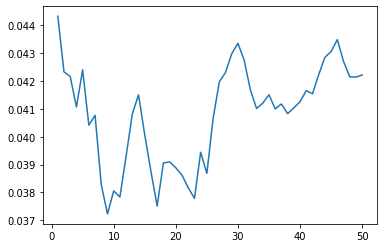

In [50]:
import matplotlib.pyplot as plt

num_trees = [i for i in range(1, 51)]

RMSEs = []
for tree in num_trees:
    graph_model = RandomForestRegressor(
        n_estimators=tree,
        max_leaf_nodes=None,
        max_depth=None,
        random_state=subset_seed,
        n_jobs=8
    )
    
    graph_model.fit(x_training, y_training1)
    
    y_true = Y_test1
    y_previsao = graph_model.predict(X_test)
    RMSE = mean_squared_error(y_true, y_previsao, squared = False)
    
    RMSEs.append(RMSE)
    
plt.plot(num_trees, RMSEs)
print(RMSEs.index(min(RMSEs)))

C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/2814193049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/2814193049.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to de

0


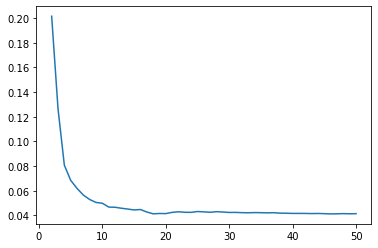

In [51]:
import matplotlib.pyplot as plt

max_leaf_nodes = [None]
for i in range(2,51):
    max_leaf_nodes.append(i)

RMSEs = []
for leaf in max_leaf_nodes:
    graph_model = RandomForestRegressor(
        n_estimators=10,
        max_leaf_nodes=leaf,
        max_depth=None,
        random_state=subset_seed,
        n_jobs=8
    )
    
    graph_model.fit(x_training, y_training1)
    
    y_true = Y_test1
    y_previsao = graph_model.predict(X_test)
    RMSE = mean_squared_error(y_true, y_previsao, squared = False)
    
    RMSEs.append(RMSE)
    
plt.plot(max_leaf_nodes, RMSEs)
print(RMSEs.index(min(RMSEs)))

C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/74668943.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/74668943.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decima

8


c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/74668943.py:17: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  graph_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


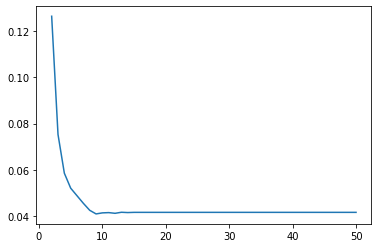

In [52]:
import matplotlib.pyplot as plt

max_depth = [None]
for i in range(2,51):
    max_depth.append(i)

RMSEs = []
for depth in max_depth:
    graph_model = RandomForestRegressor(
        n_estimators=10,
        max_leaf_nodes=40,
        max_depth=depth,
        random_state=subset_seed,
        n_jobs=8
    )
    
    graph_model.fit(x_training, y_training1)
    
    y_true = Y_test1
    y_previsao = graph_model.predict(X_test)
    RMSE = mean_squared_error(y_true, y_previsao, squared = False)
    
    RMSEs.append(RMSE)
    
plt.plot(max_depth, RMSEs)
print(RMSEs.index(min(RMSEs)))

In [53]:
best_model = RandomForestRegressor(
    n_estimators = 9,
    max_leaf_nodes = None,
    max_depth = 9,
    random_state = subset_seed,
    n_jobs = 4,
)

best_model.fit(x_training, y_training1)

y_true = Y_test1
y_previsao = best_model.predict(X_test)
RMSE = mean_squared_error(y_true, y_previsao, squared = False)

print(
    f"O RMSE do melhor modelo de floresta aleatória foi de {RMSE} graus."
)

O RMSE do melhor modelo de floresta aleatória foi de 0.03937589857252515 graus.


C:\Users\PEDRO2~1\AppData\Local\Temp/ipykernel_5752/1653901506.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  best_model.fit(x_training, y_training1)
c:\venv\ilumpy\lib\site-packages\sklearn\utils\validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)


In [57]:
X_test1

,latitude,wind_speed,wind_degree,pressure,precip,humidity,cloudcover,uv_index,visibility
27,0.829762,0.098039,0.681564,0.98728,0.044444,1.0,1.0,0.333333,0.2
166,-0.35319,0.372549,0.787709,0.992172,0.0,0.19,0.0,0.111111,1.0
29,0.812809,0.078431,0.340782,0.986301,0.0,0.86,0.48,0.333333,1.0
49,0.642571,0.27451,0.382682,0.988258,0.0,0.48,0.22,0.777778,1.0
39,0.72769,0.215686,0.441341,0.992172,0.088889,0.85,0.76,0.444444,0.9
50,0.634095,0.215686,0.343575,0.989237,0.0,0.6,0.36,0.666667,1.0
136,-0.097834,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0
172,-0.403814,0.078431,0.243017,0.990215,0.0,0.71,0.03,0.111111,1.0
99,0.216977,0.196078,0.469274,0.984344,0.0,0.13,0.07,1.0,1.0
137,-0.106428,0.176471,0.949721,0.986301,0.0,0.19,0.0,0.111111,1.0


In [58]:
sorted_x_test = X_test1.copy()
df_sorted_x_test = pd.DataFrame(sorted_x_test)
df_sorted_x_test = df_sorted_x_test.sort_values(0, axis=0)

sorted_x_training = x_training.copy()
df_sorted_x_training = pd.DataFrame(sorted_x_training)
df_sorted_x_training = df_sorted_x_training.sort_values(0, axis=0)

KeyError: 0

In [59]:
plt.scatter(df_sorted_x_test[0], Y_test1, color='red')
#plt.scatter(df_sorted_x_training[0], y_training1, color='yellow')
plt.plot(df_sorted_x_test[0], y_previsao)

KeyError: 0